<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DES VENTES EN LIGNE DE LA LIBRAIRIE LAPAGE 
</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
pd.options.mode.copy_on_write = True

In [2]:
#Importation de la librairie plotly express (visualisation des données)
import plotly.express as px

In [3]:
#Importation de la librairie matplotlib (visualisation des données)
import matplotlib.pyplot as plt

In [4]:
#Importation de la librairie datetime (manipulation dates et heures)
from datetime import datetime

In [5]:
#Importation de la librairie numpy  (manipulation des tableaux et l'algèbre linéaire)
import numpy as np

In [6]:
#Importation de la librairie seaborn  (visualisation des données)
import seaborn as sns

In [7]:
#Importation de la librairie seaborn  (analyses statistiques)
import scipy.stats as stats

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [8]:
#Importation du fichier customers.csv
df_customer = pd.read_csv("customers_non_nettoyer.csv", sep=',')
#Importation du fichier products.csv
df_product = pd.read_csv("products_non_nettoyer.csv", sep=',')
#importation du fichier Transactions.csv
dtype_spec = {'id_prod': str, 'session_id': str, 'client_id': str}
df_transaction = pd.read_csv("Transactions.csv", sep=';', dtype=dtype_spec, parse_dates=['date'])

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [9]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_customer.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} clients".format(df_customer.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_customer.shape[1]))

Dimensions du dataset df_customer: (8623, 3)
Le tableau comporte 8623 clients
Le tableau comporte 3 colonnes


In [10]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_customer.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_customer.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_customer.nunique()))


La nature des données dans chacune des colonnes:
client_id    object
sex          object
birth         int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
client_id    8623
sex          8623
birth        8623
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
client_id    8623
sex             2
birth          76
dtype: int64



In [11]:
#Affiche les 5 premières lignes de la table
df_customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [12]:
#Vérifie la cohérence des données de la colonne sex

# Vérifie les valeurs possibles prises par la colonne sex
print("Valeurs uniques de la colonne sex: {}".format(df_customer['sex'].unique()))


Valeurs uniques de la colonne sex: ['f' 'm']


In [13]:
#Vérifie la cohérence des données de la colonne birth

# Récupère l'année actuelle
current_year = datetime.now().year

# Filtre les lignes où l'année de naissance est < 1900 ou > année actuelle
df_customer_filtered = df_customer[(df_customer['birth'] >= 1900) & (df_customer['birth'] <= current_year)]

# Affiche le DataFrame filtré
print("Dataset df_customer:")
print(df_customer_filtered)



Dataset df_customer:
     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


In [14]:
#Vérifie la cohérence des données de la colonne client_id

# Filtre les lignes où 'client_id' correspond au format "c_" suivi d'un ou plusieurs chiffres
df_customer_filtered = df_customer_filtered[df_customer_filtered['client_id'].str.match(r'^c_\d+$')]

# Affiche le DataFrame filtré
print("Dataset df_customer:")
print(df_customer_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_customer[~df_customer['client_id'].str.match(r'^c_\d+$')])


Dataset df_customer:
     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8621 rows x 3 columns]

Données erronées:
     client_id sex  birth
2735      ct_0   f   2001
8494      ct_1   m   2001


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier products.csv</h3>
</div>

In [15]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_product: {}".format(df_product.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} produits".format(df_product.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_product.shape[1]))

Dimensions du dataset df_product: (3287, 3)
Le tableau comporte 3287 produits
Le tableau comporte 3 colonnes


In [16]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_product.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_product.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_product.nunique()))

La nature des données dans chacune des colonnes:
id_prod     object
price      float64
categ        int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
id_prod    3287
price      3287
categ      3287
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
id_prod    3287
price      1455
categ         3
dtype: int64



In [17]:
#Affiche les 5 premières lignes de la table
df_product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [18]:
#Vérifie la cohérence des données de la colonne id_prod

# Crée une expression régulière pour chaque ligne basée sur la colonne 'categ'
pattern = df_product['categ'].astype(str) + r"_\d+$"

# Filtre les lignes où 'id_prod' correspond à ce format
df_product_filtered = df_product[df_product.apply(lambda row: pd.Series(row['id_prod']).str.match(pattern[row.name]).any(), axis=1)]


# Affiche le DataFrame filtré
print("Dataset df_product:")
print(df_product_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_product[~df_product.apply(lambda row: pd.Series(row['id_prod']).str.match(pattern[row.name]).any(), axis=1)]
)

Dataset df_product:
     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]

Données erronées:
    id_prod  price  categ
731     T_0   -1.0      0


In [19]:
# Filtre les lignes où 'price' est supérieur à 0
df_product_filtered = df_product_filtered[df_product_filtered['price'] > 0]

# Affiche le DataFrame filtré
print(df_product_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_product[df_product['price'] <= 0])

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]

Données erronées:
    id_prod  price  categ
731     T_0   -1.0      0


In [20]:
#Vérifie la cohérence des données de la colonne categ

# Vérifie les valeurs possibles prises par la colonne categ
print("Valeurs uniques de la colonne categ: {}".format(df_product['categ'].unique()))


Valeurs uniques de la colonne categ: [0 1 2]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier Transactions.csv</h3>
</div>

In [21]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_product: {}".format(df_transaction.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} transactions".format(df_transaction.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_transaction.shape[1]))

Dimensions du dataset df_product: (1048575, 4)
Le tableau comporte 1048575 transactions
Le tableau comporte 4 colonnes


In [22]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_transaction.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_transaction.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_transaction.nunique()))

La nature des données dans chacune des colonnes:
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
id_prod         3265
date          687415
session_id    345505
client_id       8600
dtype: int64



In [23]:
#Affiche les 5 premières lignes de la table
df_transaction.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [24]:
# Filtre les lignes où au moins une des colonnes spécifiées est vide
df_transaction_filtered = df_transaction[~
    df_transaction[['date', 'session_id', 'client_id', 'id_prod']].isna().any(axis=1) |
    (df_transaction[['date', 'session_id', 'client_id', 'id_prod']] == '').any(axis=1)
]

# Affiche le DataFrame filtré
print(df_transaction_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_transaction[
    df_transaction[['date', 'session_id', 'client_id', 'id_prod']].isna().any(axis=1) |
    (df_transaction[['date', 'session_id', 'client_id', 'id_prod']] == '').any(axis=1)
])

       id_prod                       date session_id client_id
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033
...        ...                        ...        ...       ...
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575

[687534 rows x 4 columns]

Données erronées:
        id_prod date session_id client_id
687534      NaN  NaT        NaN       NaN
687535      NaN  NaT        NaN       NaN
687536      NaN  NaT        NaN       NaN
687537      NaN  NaT        Na

In [25]:
#Vérifie la cohérence des données de la colonne session_id

# Filtre les lignes où 'session_id' correspond au format "s_" suivi d'un ou plusieurs chiffres
df_transaction_filtered = df_transaction_filtered[df_transaction_filtered['session_id'].str.match(r'^s_\d+$')]

# Affiche le DataFrame filtré
print("Dataset df_customer:")
print(df_transaction_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_transaction_filtered[~df_transaction_filtered['session_id'].str.match(r'^s_\d+$')])

Dataset df_customer:
       id_prod                       date session_id client_id
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033
...        ...                        ...        ...       ...
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575

[687534 rows x 4 columns]

Données erronées:
Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_transaction et df_customer</h3>
</div>

In [26]:
#Fusion des fichiers df_transaction et df_customer
df_merge = pd.merge(df_transaction, df_customer, on='client_id', how='inner')


In [27]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print(df_merge.shape)
#nombre_valeurs_nulles = df_merge[''].isnull().sum()
#print(nombre_valeurs_nulles)
print("Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne")

(687534, 6)
Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne


In [28]:
#récapitualitf des données
print(df_merge.head())
print(df_merge.shape)
print(df_merge.dtypes)

  id_prod                       date session_id client_id sex  birth
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967
1   1_498 2021-03-11 00:57:22.865244     s_4624     c_329   f   1967
2  0_1140 2021-03-16 10:01:30.705174     s_7071     c_329   f   1967
3   1_451 2021-03-18 17:26:18.887580     s_8134     c_329   f   1967
4   1_381 2021-04-25 13:26:06.218857    s_25561     c_329   f   1967
(687534, 6)
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
dtype: object


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_product</h3>
</div>

In [29]:
#Fusion des fichiers df_merge et df_product
df_merge = pd.merge(df_merge, df_product, on='id_prod', how='inner')


In [30]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print(df_merge.shape)
#nombre_valeurs_nulles = df_merge[''].isnull().sum()
#print(nombre_valeurs_nulles)
print("Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne")

(687534, 8)
Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne


In [31]:
#Récapitulatif des données
print(df_merge.head())
print(df_merge.shape)
print(df_merge.dtypes)

  id_prod                       date session_id client_id sex  birth  price  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967  11.99   
1  0_1259 2022-10-01 00:01:07.843138   s_275943     c_329   f   1967  11.99   
2  0_1259 2022-12-01 00:01:07.843138   s_305291     c_329   f   1967  11.99   
3  0_1259 2023-01-01 00:01:07.843138   s_320153     c_329   f   1967  11.99   
4  0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609   m   1980  11.99   

   categ  
0      0  
1      0  
2      0  
3      0  
4      0  
(687534, 8)
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
price                float64
categ                  int64
dtype: object


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Elaboration du dataset df_merge</h3>
</div>

In [32]:
#Exemple pour mettre une colonne en index

# Mettre la colonne 'date' en tant qu'index
#df_merge = df_merge.set_index('date')

In [33]:
df_merge.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0
1,0_1259,2022-10-01 00:01:07.843138,s_275943,c_329,f,1967,11.99,0
2,0_1259,2022-12-01 00:01:07.843138,s_305291,c_329,f,1967,11.99,0
3,0_1259,2023-01-01 00:01:07.843138,s_320153,c_329,f,1967,11.99,0
4,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,m,1980,11.99,0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse du chiffre d'affaires </h2>
</div>

In [34]:
# Création colonne age

# Obtenir l'année actuelle
current_year = datetime.now().year - 1

# Calcule l'âge à partir de l'année de naissance
df_merge['age'] = current_year - df_merge['birth']

In [35]:
#Calcule le CA total (avec BtoB)
ca_total = df_merge['price'].sum()

#Affiche le CA total
print(f"Le chiffre d'affaires total est : {round(ca_total,2)}€")

Le chiffre d'affaires total est : 12027663.1€


C:\Users\kevin\AppData\Local\Temp\ipykernel_1856\996078180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_merge.resample('D', on='date').sum()


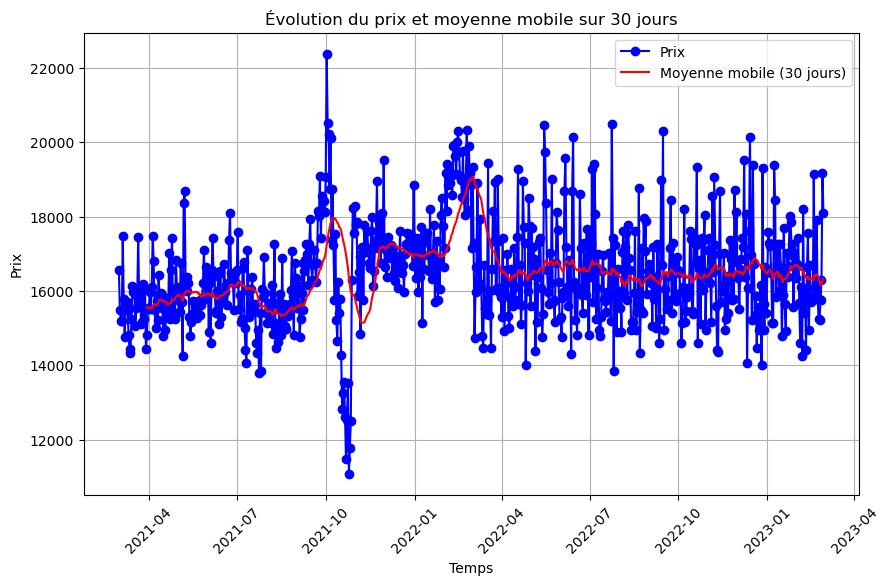

In [36]:
# Trie les données par date
df_merge = df_merge.sort_values('date')

# Resample les données par jour, en prenant la somme des prix pour chaque jour
df_resampled = df_merge.resample('D', on='date').sum()

# Calcule la moyenne mobile sur 7 jours
df_resampled['rolling_mean'] = df_resampled['price'].rolling(window=30).mean()

# Crée la figure et les axes
plt.figure(figsize=(10, 6))

# Trace les données originales (resamplées)
plt.plot(df_resampled.index, df_resampled["price"], marker='o', linestyle='-', color='b', label='Prix')

# Trace la moyenne mobile
plt.plot(df_resampled.index, df_resampled["rolling_mean"], linestyle='-', color='r', label='Moyenne mobile (30 jours)')

# Ajoute un titre et des labels aux axes
plt.title('Évolution du prix et moyenne mobile sur 30 jours')
plt.xlabel('Temps')
plt.ylabel('Prix')

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajoute une légende
plt.legend()

# Affiche la grille
plt.grid(True)

# Affiche le graphique
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_1856\2860436922.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_merge.resample('D', on='date').sum()


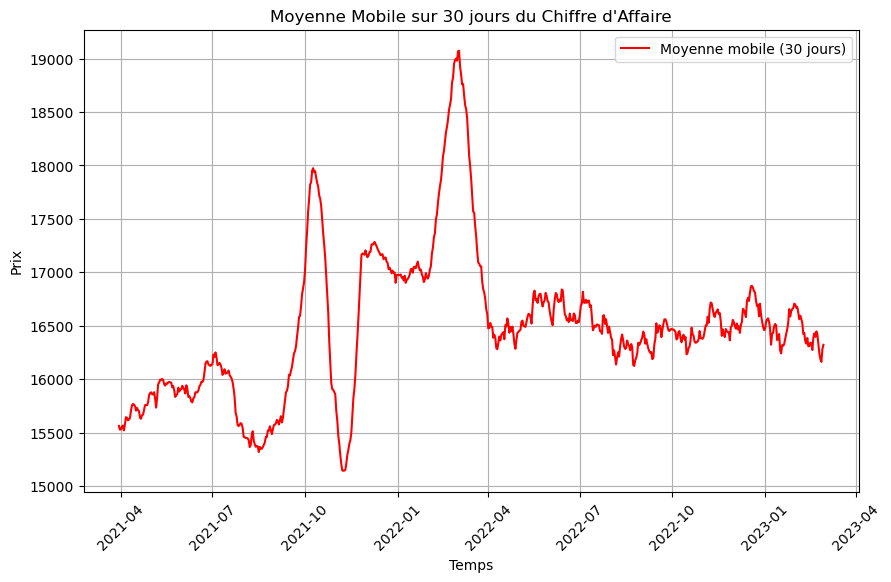

In [37]:
# Trie les données par date
df_merge = df_merge.sort_values('date')

# Resample les données par jour, en prenant la somme des prix pour chaque jour
df_resampled = df_merge.resample('D', on='date').sum()

# Calcule la moyenne mobile sur 7 jours
df_resampled['rolling_mean'] = df_resampled['price'].rolling(window=30).mean()

# Crée la figure et les axes
plt.figure(figsize=(10, 6))

# Trace les données originales (resamplées)
#plt.plot(df_resampled.index, df_resampled["price"], marker='o', linestyle='-', color='b', label='Prix')

# Trace la moyenne mobile
plt.plot(df_resampled.index, df_resampled["rolling_mean"], linestyle='-', color='r', label='Moyenne mobile (30 jours)')

# Ajoute un titre et des labels aux axes
plt.title('Moyenne Mobile sur 30 jours du Chiffre d\'Affaire')
plt.xlabel('Temps')
plt.ylabel('Prix')

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajoute une légende
plt.legend()

# Affiche la grille
plt.grid(True)

# Affiche le graphique
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_1856\1243424473.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_merge.resample('D', on='date').sum()


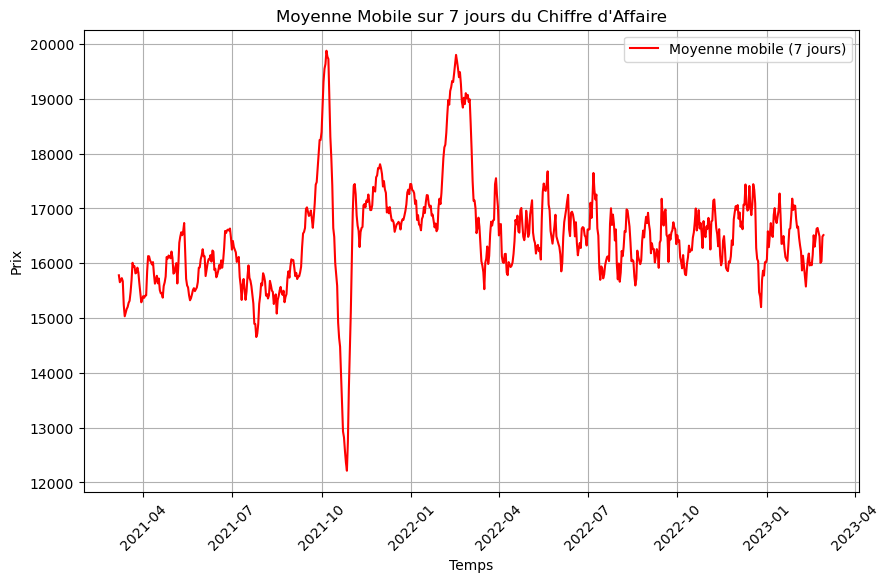

In [38]:
# Trie les données par date
df_merge = df_merge.sort_values('date')

# Resample les données par jour, en prenant la somme des prix pour chaque jour
df_resampled = df_merge.resample('D', on='date').sum()

# Calcule la moyenne mobile sur 7 jours
df_resampled['rolling_mean'] = df_resampled['price'].rolling(window=7).mean()

# Crée la figure et les axes
plt.figure(figsize=(10, 6))

# Trace les données originales (resamplées)
#plt.plot(df_resampled.index, df_resampled["price"], marker='o', linestyle='-', color='b', label='Prix')

# Trace la moyenne mobile
plt.plot(df_resampled.index, df_resampled["rolling_mean"], linestyle='-', color='r', label='Moyenne mobile (7 jours)')

# Ajoute un titre et des labels aux axes
plt.title('Moyenne Mobile sur 7 jours du Chiffre d\'Affaire')
plt.xlabel('Temps')
plt.ylabel('Prix')

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajoute une légende
plt.legend()

# Affiche la grille
plt.grid(True)

# Affiche le graphique
plt.show()


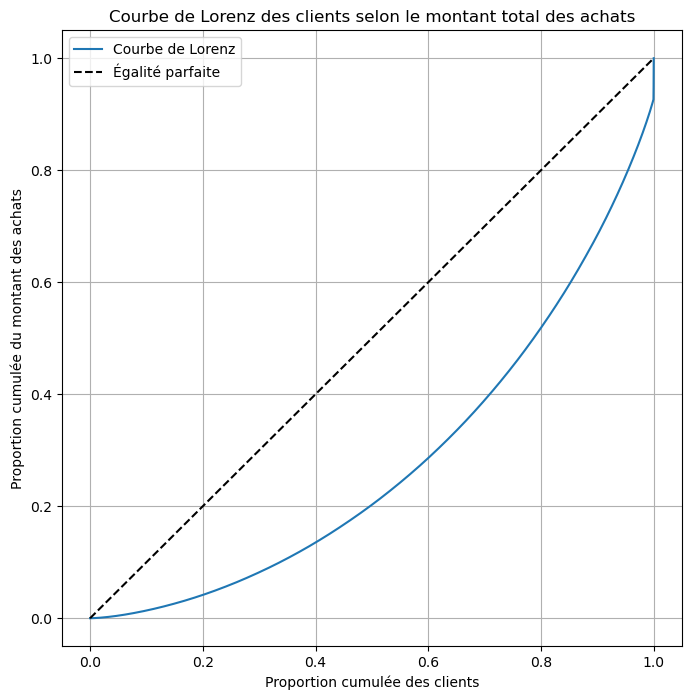

In [39]:
#Regroupe par client et calculer la somme des achats
df_client_total = df_merge.groupby('client_id')['price'].sum().reset_index()

#Trie les clients par somme des achats croissante
df_client_total_sorted = df_client_total.sort_values(by='price')

#Calcule la proportion cumulée des clients et des montants
df_client_total_sorted['cum_client_pct'] = np.linspace(0, 1, len(df_client_total_sorted))
df_client_total_sorted['cum_price_pct'] = df_client_total_sorted['price'].cumsum() / df_client_total_sorted['price'].sum()

#Trace la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(df_client_total_sorted['cum_client_pct'], df_client_total_sorted['cum_price_pct'], label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Égalité parfaite')
plt.xlabel('Proportion cumulée des clients')
plt.ylabel('Proportion cumulée du montant des achats')
plt.title('Courbe de Lorenz des clients selon le montant total des achats')
plt.legend()
plt.grid(True)
plt.show()


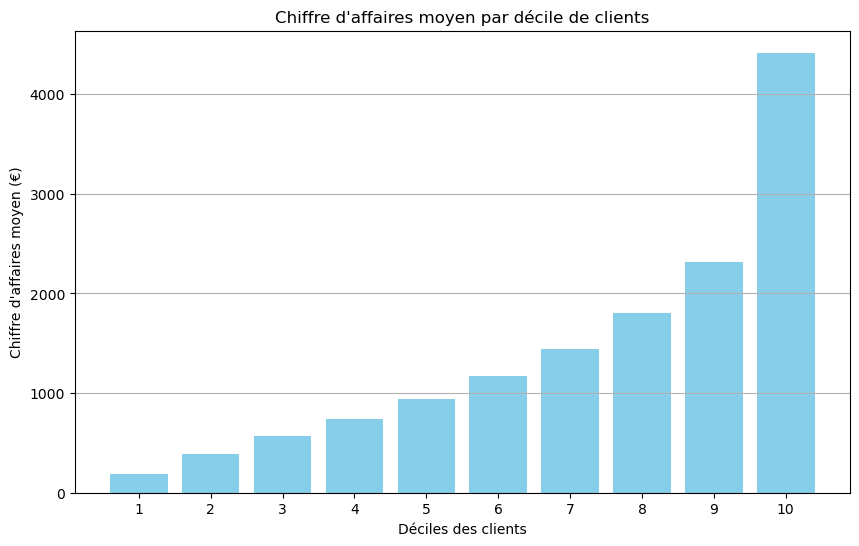

In [40]:
#Calcule le chiffre d'affaires total par client
df_client_total = df_merge.groupby('client_id')['price'].sum().reset_index()

#Classe les clients en déciles
df_client_total['decile'] = pd.qcut(df_client_total['price'], 10, labels=False) + 1

#Calcule le chiffre d'affaires moyen par décile
df_deciles = df_client_total.groupby('decile')['price'].mean().reset_index()

#Trace le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(df_deciles['decile'], df_deciles['price'], color='skyblue')
plt.xlabel('Déciles des clients')
plt.ylabel('Chiffre d\'affaires moyen (€)')
plt.title('Chiffre d\'affaires moyen par décile de clients')
plt.xticks(df_deciles['decile'])
plt.grid(axis='y')
plt.show()


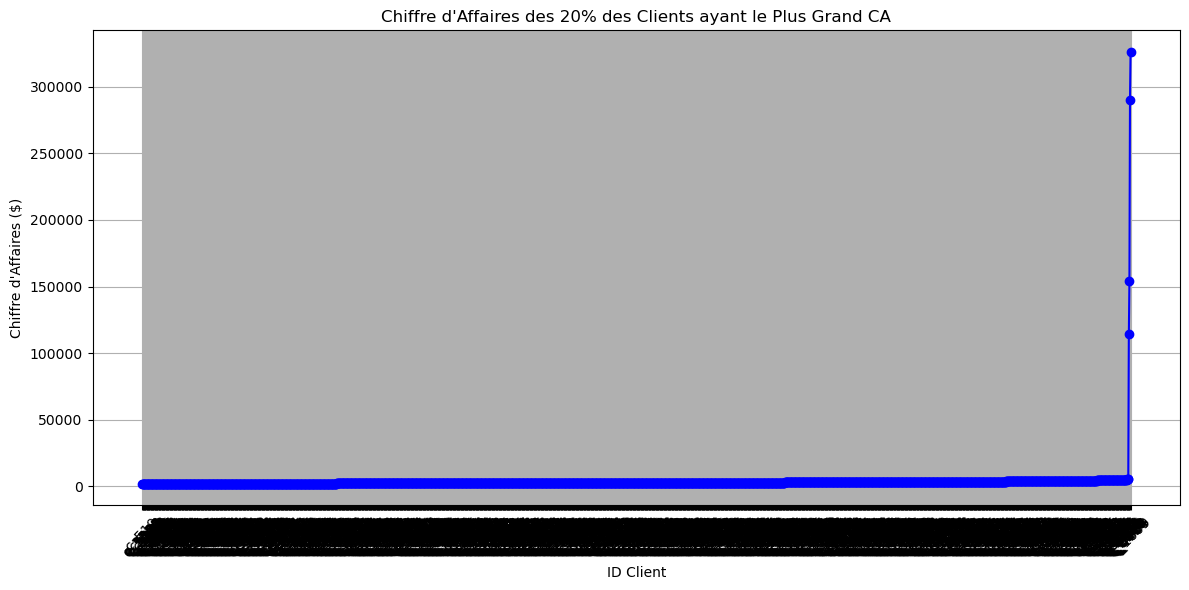

In [41]:
# Calcul du chiffre d'affaires par client
revenue_by_client = df_merge.groupby('client_id')['price'].sum()

# Trie les clients par chiffre d'affaires croissant
revenue_by_client_sorted = revenue_by_client.sort_values()

# Filtre les 20 % des clients avec le plus grand chiffre d'affaires
top_20_percent_clients = revenue_by_client_sorted.tail(int(len(revenue_by_client_sorted) * 0.2))

# Création du graphique en courbe pour les 20 % des clients avec le plus grand CA
plt.figure(figsize=(12, 6))
plt.plot(top_20_percent_clients.index, top_20_percent_clients.values, marker='o', color='blue')
plt.title('Chiffre d\'Affaires des 20% des Clients ayant le Plus Grand CA')
plt.xlabel('ID Client')
plt.ylabel('Chiffre d\'Affaires ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


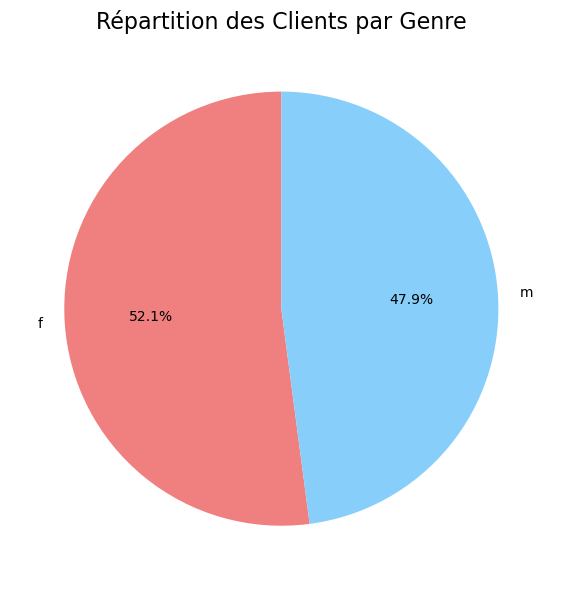

In [42]:
#Répartition des achats par genre
transactions_par_sexe = df_merge.groupby('sex')['client_id'].nunique()

#Pie chart pour visualiser la répartition par sexe
plt.figure(figsize=(6,6))
transactions_par_sexe.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Répartition des Clients par Genre', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

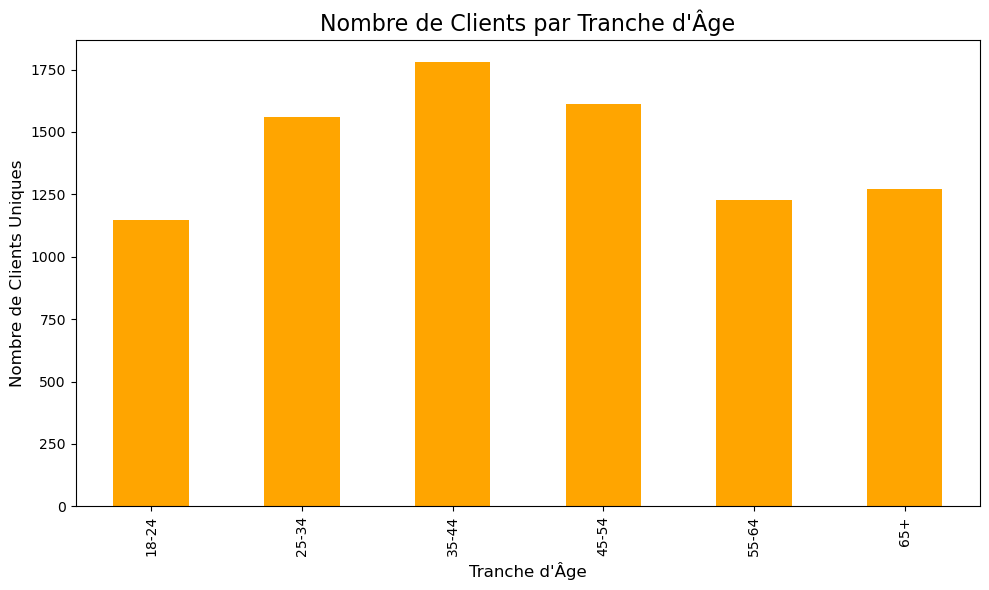

In [43]:
# Défini des tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_merge['age_group'] = pd.cut(df_merge['age'], bins=bins, labels=labels, right=False)

# Nombre de clients uniques par tranche d'âge
clients_par_age_group = df_merge.groupby('age_group')['client_id'].nunique()

# Bar plot pour visualiser les clients par tranche d'âge
plt.figure(figsize=(10,6))
clients_par_age_group.plot(kind='bar', color='orange')
plt.title('Nombre de Clients par Tranche d\'Âge', fontsize=16)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Nombre de Clients Uniques', fontsize=12)
plt.tight_layout()
plt.show()

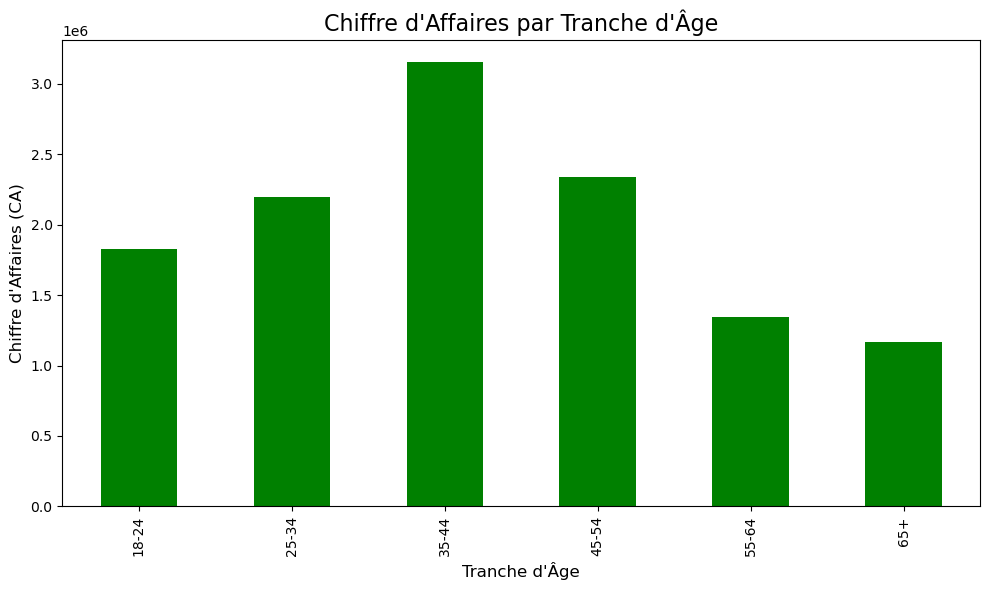

In [44]:
# Défini les tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_merge['age_group'] = pd.cut(df_merge['age'], bins=bins, labels=labels, right=False)

# Calcule le CA total par tranche d'âge
ca_par_age_group = df_merge.groupby('age_group')['price'].sum()

# Crée le bar plot pour visualiser le CA par tranche d'âge
plt.figure(figsize=(10, 6))
ca_par_age_group.plot(kind='bar', color='green')
plt.title('Chiffre d\'Affaires par Tranche d\'Âge', fontsize=16)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (CA)', fontsize=12)
plt.tight_layout()
plt.show()

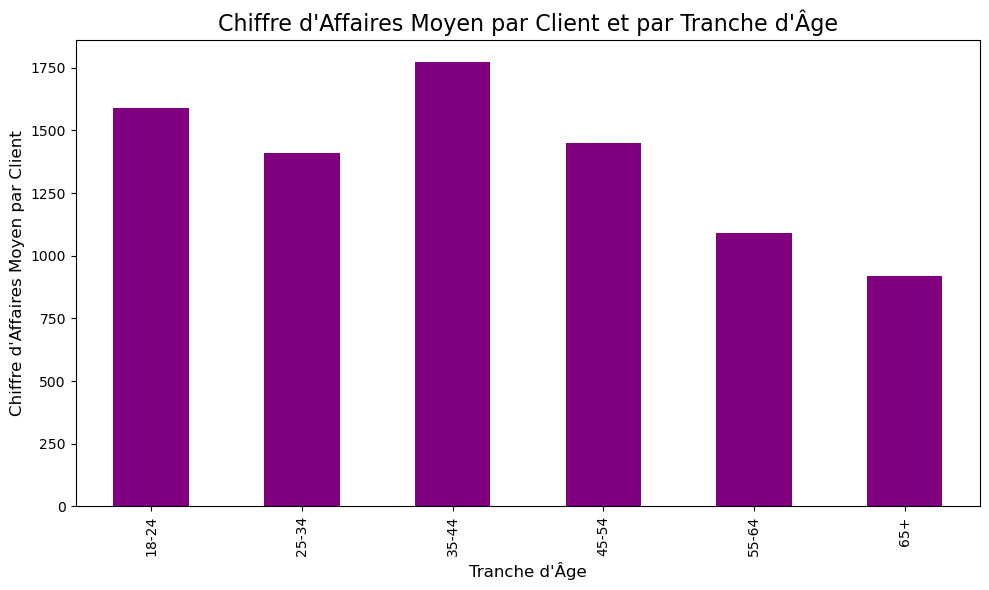

In [45]:
# Défini les tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_merge['age_group'] = pd.cut(df_merge['age'], bins=bins, labels=labels, right=False)

# Calcule le CA total par tranche d'âge
ca_total_par_age_group = df_merge.groupby('age_group')['price'].sum()

# Calcule le nombre de clients uniques par tranche d'âge
clients_uniques_par_age_group = df_merge.groupby('age_group')['client_id'].nunique()

# Calcule le CA moyen par client (CA total / nombre de clients uniques)
ca_moyen_par_client = ca_total_par_age_group / clients_uniques_par_age_group

# Crée le bar plot pour visualiser le CA moyen par client et par tranche d'âge
plt.figure(figsize=(10, 6))
ca_moyen_par_client.plot(kind='bar', color='purple')
plt.title('Chiffre d\'Affaires Moyen par Client et par Tranche d\'Âge', fontsize=16)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Chiffre d\'Affaires Moyen par Client', fontsize=12)
plt.tight_layout()
plt.show()

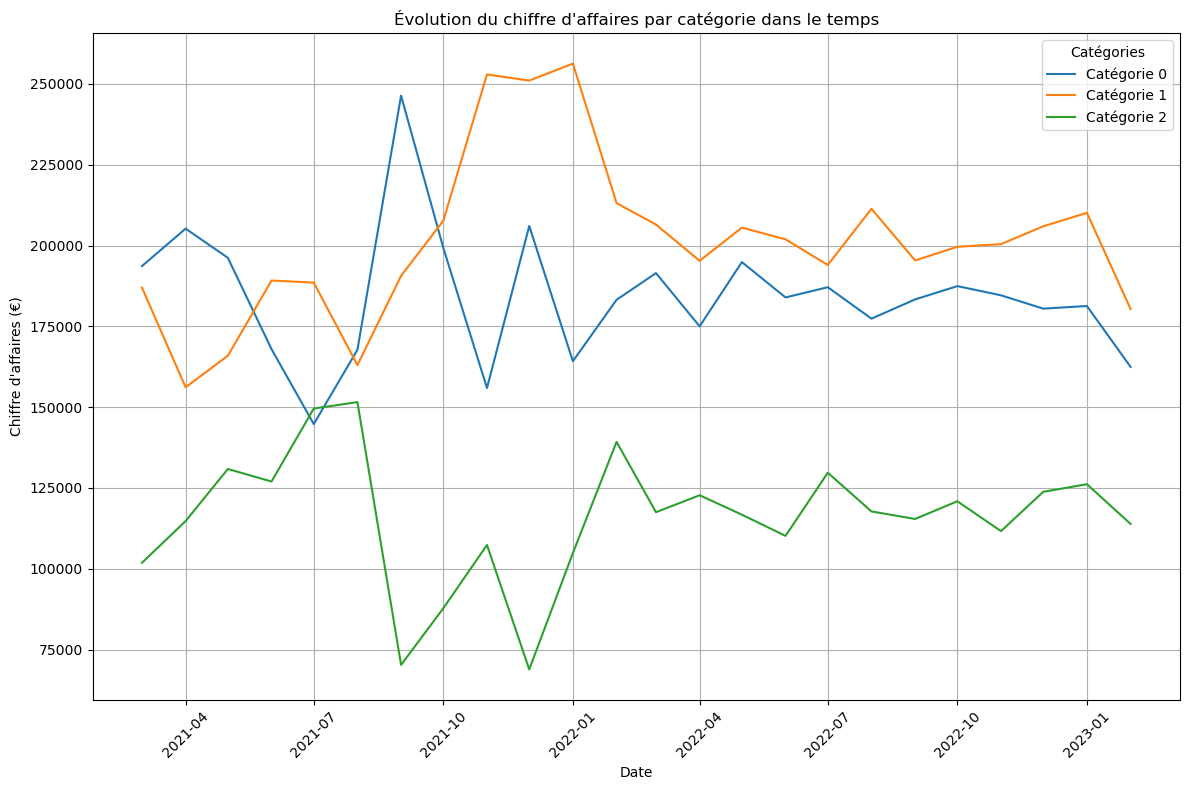

In [46]:
#Calcule le chiffre d'affaires mensuel par catégorie
df_monthly_sales = df_merge.groupby([df_merge['date'].dt.to_period('M'), 'categ'])['price'].sum().reset_index()
df_monthly_sales['date'] = df_monthly_sales['date'].dt.to_timestamp()

#Trace l'évolution du chiffre d'affaires par catégorie
plt.figure(figsize=(12, 8))

#Trace une courbe pour chaque catégorie
for categ in df_monthly_sales['categ'].unique():
    categ_data = df_monthly_sales[df_monthly_sales['categ'] == categ]
    plt.plot(categ_data['date'], categ_data['price'], label=f'Catégorie {categ}')

plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('Évolution du chiffre d\'affaires par catégorie dans le temps')
plt.legend(title='Catégories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
#Calcule le nombre de clients uniques
nb_clients_uniques = df_merge['client_id'].nunique()

#Affiche le nombre de clients uniques
print(f"Le nombre de clients uniques est : {nb_clients_uniques}")

Le nombre de clients uniques est : 8600


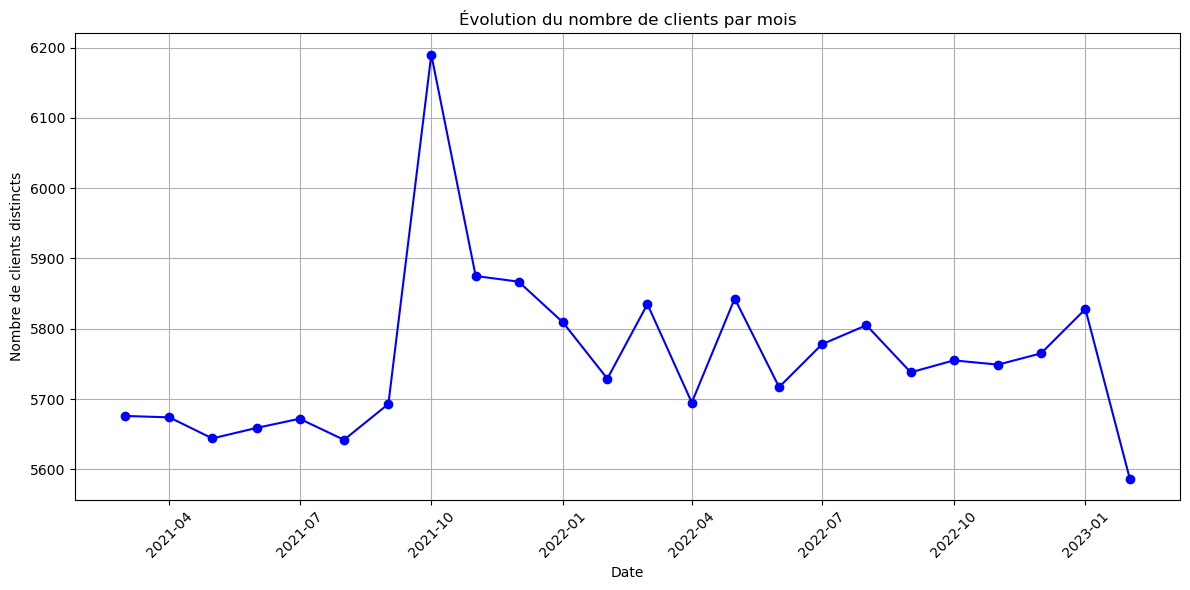

In [48]:
#Calcule le nombre de clients distincts par mois
df_monthly_clients = df_merge.groupby(df_merge['date'].dt.to_period('M'))['client_id'].nunique().reset_index()
df_monthly_clients['date'] = df_monthly_clients['date'].dt.to_timestamp()

#Trace l'évolution du nombre de clients par mois
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_clients['date'], df_monthly_clients['client_id'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Nombre de clients distincts')
plt.title('Évolution du nombre de clients par mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
#Calcule le nombre de transactions uniques
nb_transactions = df_merge['session_id'].nunique()

#Affiche le nombre de transactions uniques
print(f"Nombre total de transactions : {nb_transactions}")

Nombre total de transactions : 345505


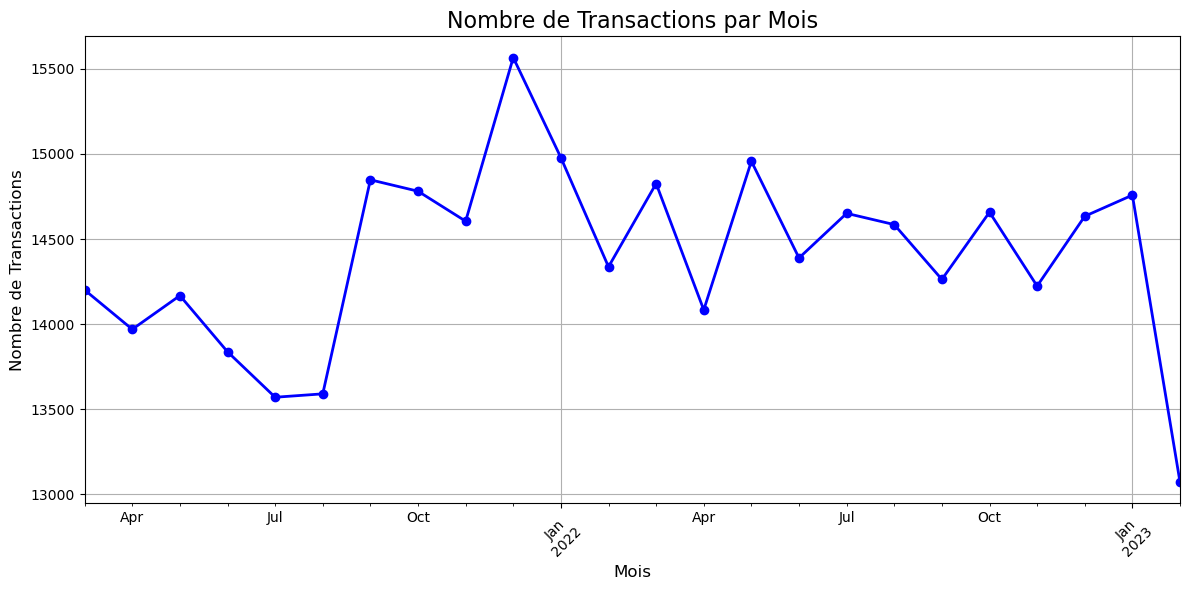

In [50]:
# Extrair l'année et le mois de chaque transaction
df_merge['year_month'] = df_merge['date'].dt.to_period('M')

# Compte les transactions uniques (session_id unique) par mois
df_monthly_transactions = df_merge.groupby('year_month')['session_id'].nunique()

# Crée la courbe
plt.figure(figsize=(12,6))
df_monthly_transactions.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)

# Ajoute des titres et labels
plt.title('Nombre de Transactions par Mois', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.grid(True)
# Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affiche la courbe
plt.tight_layout()
plt.show()


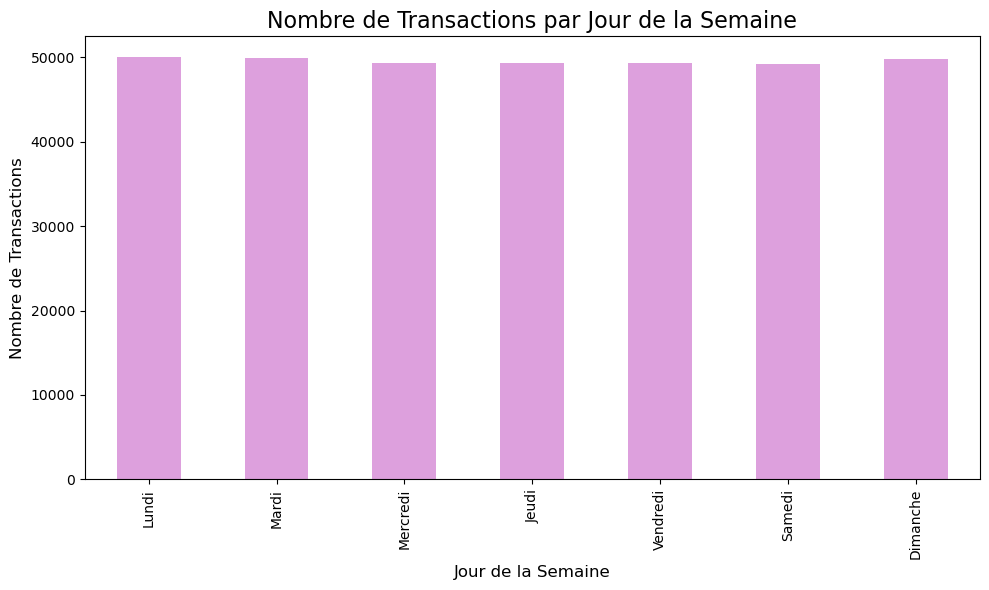

In [51]:
# Extraire le jour de la semaine
df_merge['day_of_week'] = df_merge['date'].dt.day_name()

# Traduis les jours en français
jours_francais = {
    'Monday': 'Lundi', 
    'Tuesday': 'Mardi', 
    'Wednesday': 'Mercredi', 
    'Thursday': 'Jeudi', 
    'Friday': 'Vendredi', 
    'Saturday': 'Samedi', 
    'Sunday': 'Dimanche'
}

# Applique la traduction des jours dans le DataFrame
df_merge['day_of_week_fr'] = df_merge['day_of_week'].map(jours_francais)

# Nombre de transactions par jour de la semaine
transactions_par_jour = df_merge.groupby('day_of_week_fr')['session_id'].nunique()

# Bar plot pour visualiser le nombre de transactions par jour de la semaine
plt.figure(figsize=(10,6))
transactions_par_jour.reindex(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']).plot(kind='bar', color='plum')
plt.title('Nombre de Transactions par Jour de la Semaine', fontsize=16)
plt.xlabel('Jour de la Semaine', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.tight_layout()
plt.show()


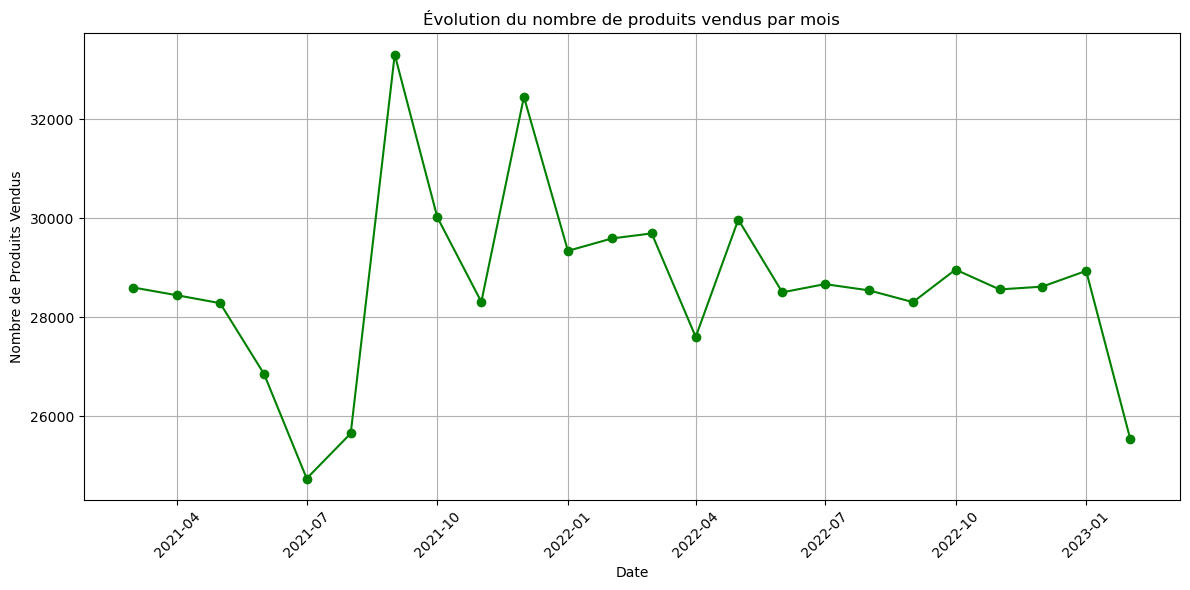

In [52]:
#Calcule le nombre de produits vendus par mois
df_monthly_sale = df_merge.groupby(df_merge['date'].dt.to_period('M')).size().reset_index(name='sale_count')
df_monthly_sale['date'] = df_monthly_sale['date'].dt.to_timestamp()

#Trace l'évolution du nombre de transactions par mois
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sale['date'], df_monthly_sale['sale_count'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Nombre de Produits Vendus')
plt.title('Évolution du nombre de produits vendus par mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


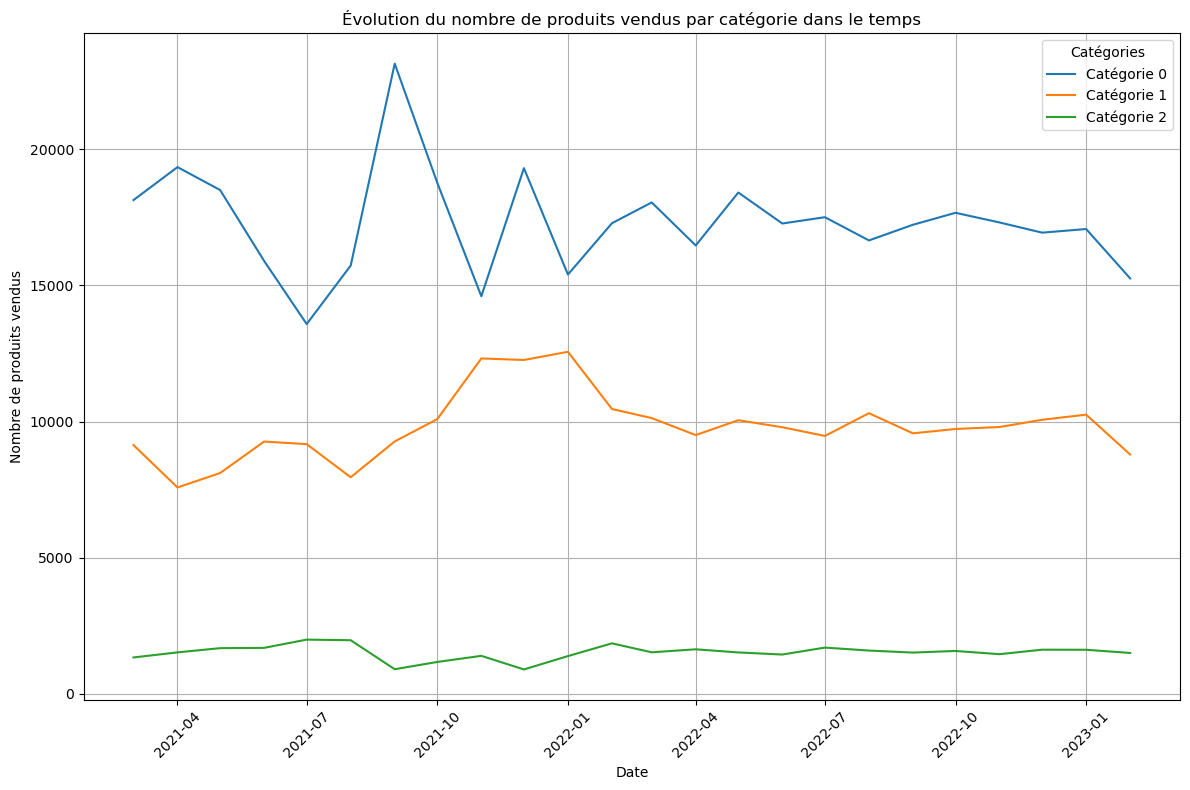

In [53]:
#Calcule le nombre de transactions par mois
df_monthly_countsales = df_merge.groupby([df_merge['date'].dt.to_period('M'), 'categ']).size().reset_index(name='sales_count')
df_monthly_countsales['date'] = df_monthly_countsales['date'].dt.to_timestamp()


#Trace l'évolution du chiffre d'affaires par catégorie
plt.figure(figsize=(12, 8))

#Trace une courbe pour chaque catégorie
for categ in df_monthly_countsales['categ'].unique():
    categ_data = df_monthly_countsales[df_monthly_countsales['categ'] == categ]
    plt.plot(categ_data['date'], categ_data['sales_count'], label=f'Catégorie {categ}')

plt.xlabel('Date')
plt.ylabel('Nombre de produits vendus')
plt.title('Évolution du nombre de produits vendus par catégorie dans le temps')
plt.legend(title='Catégories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


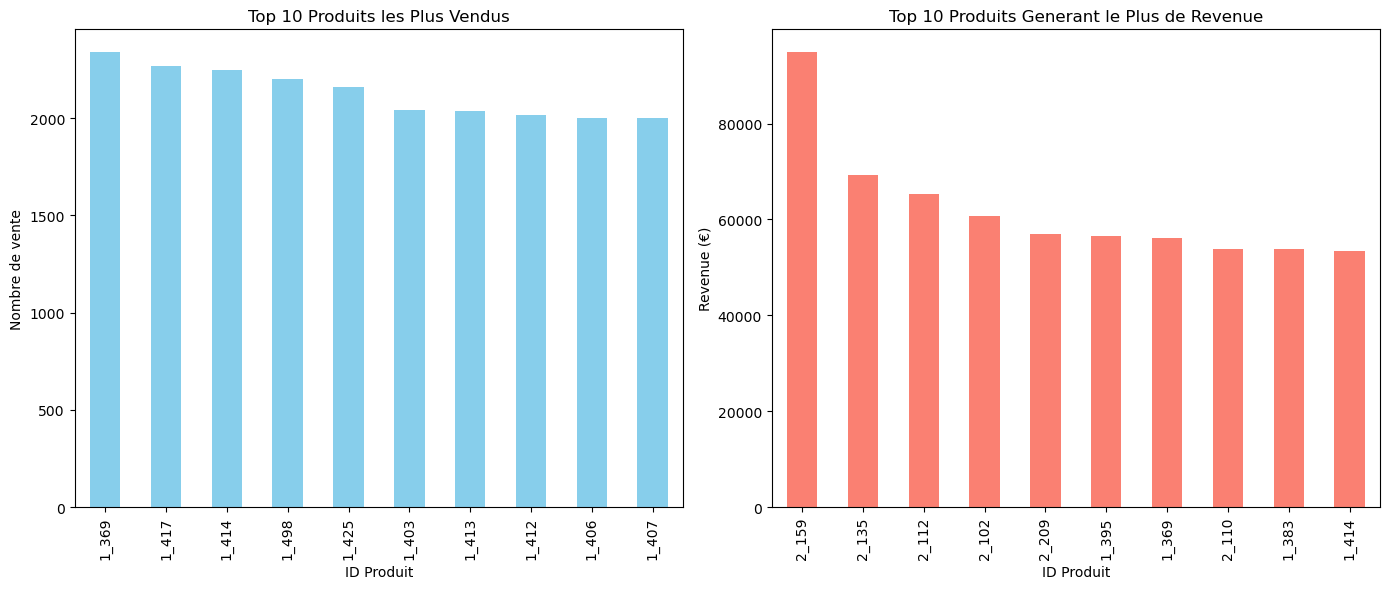

In [54]:
#Récupère le Top 10 Produits les Plus Vendus
top_sold_products = df_merge['id_prod'].value_counts().nlargest(10)

#Récupère le Top 10 Produits Generant le Plus de Revenue
df_merge['revenue'] = df_merge['price']
top_revenue_products = df_merge.groupby('id_prod')['revenue'].sum().nlargest(10)

#Trace les graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Trace le graphique en barres: Top 10 Produits les Plus Vendus
top_sold_products.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Produits les Plus Vendus')
ax1.set_xlabel('ID Produit')
ax1.set_ylabel('Nombre de vente')

#Trace le graphique en barres: Top 10 Produits Generant le Plus de Revenue
top_revenue_products.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Top 10 Produits Generant le Plus de Revenue')
ax2.set_xlabel('ID Produit')
ax2.set_ylabel('Revenue (€)')

plt.tight_layout()
plt.show()

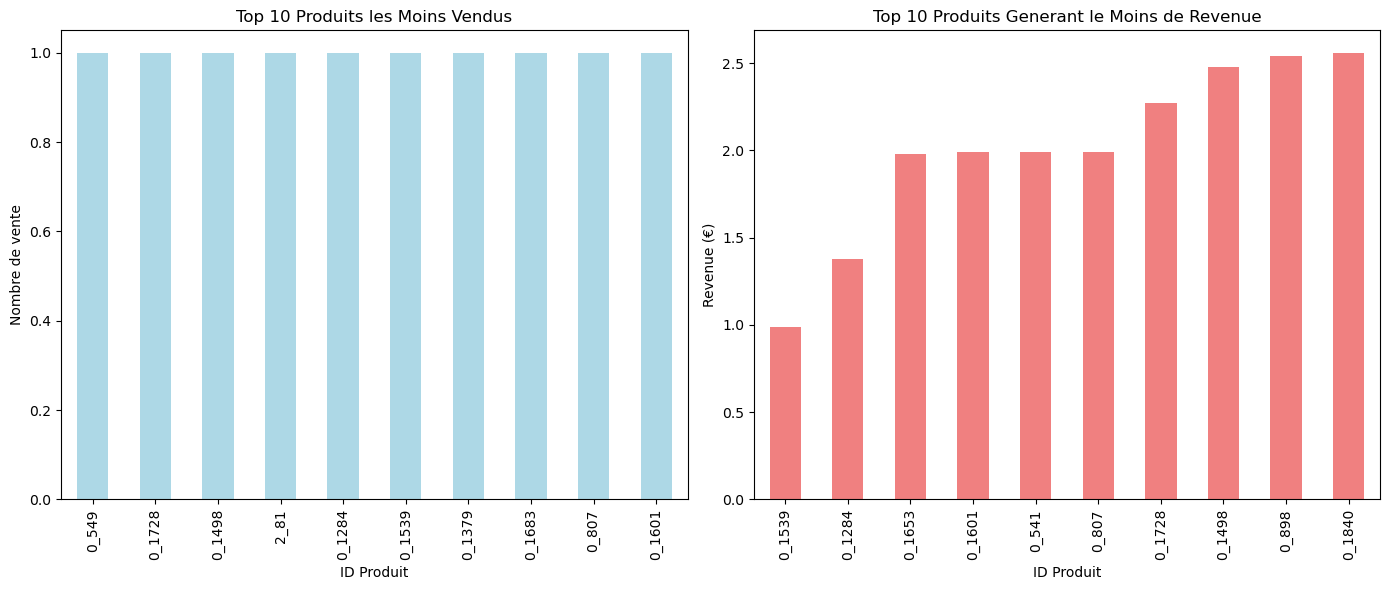

In [55]:
#Récupère le Top 10 Produits les Moins Vendus
least_sold_products = df_merge['id_prod'].value_counts().nsmallest(10)

#Récupère le Top 10 Produits Generant le Plus de Revenue
least_revenue_products = df_merge.groupby('id_prod')['revenue'].sum().nsmallest(10)

#Trace les graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Trace le graphique en barres: Top 10 Produits les Moins Vendus
least_sold_products.plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Top 10 Produits les Moins Vendus')
ax1.set_xlabel('ID Produit')
ax1.set_ylabel('Nombre de vente')

#Trace le graphique en barres: Top 10 Produits Generant le Moins de Revenue
least_revenue_products.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Top 10 Produits Generant le Moins de Revenue')
ax2.set_xlabel('ID Produit')
ax2.set_ylabel('Revenue (€)')

plt.tight_layout()
plt.show()

In [56]:
#Calcule le panier moyen par transactions
panier_moyen = df_merge.groupby('session_id')['price'].sum().mean()

#Affiche le panier moyen par transactions
print(f"Panier moyen par transaction : {panier_moyen:.2f} €")

Panier moyen par transaction : 34.81 €


In [57]:
#Calcule le nombre moyen de transactions par client
transactions_par_client = df_merge.groupby('client_id')['session_id'].nunique().mean()

#Affiche le nombre moyen de transactions par client
print(f"Nombre moyen de transactions par client : {transactions_par_client:.2f}")

Nombre moyen de transactions par client : 40.17


In [58]:
#Taux de réachat (Client Répétitifs vs Nouveaux)

# Clients unique
nb_clients_uniques = df_merge['client_id'].nunique()

# Clients ayant fait plus d'une transaction
clients_recurrents = df_merge.groupby('client_id')['session_id'].nunique()
taux_reachat = (clients_recurrents[clients_recurrents > 1].count() / nb_clients_uniques) * 100

#Affiche le Taux de réachat
print(f"Taux de réachat : {taux_reachat:.2f} %")

Taux de réachat : 99.77 %


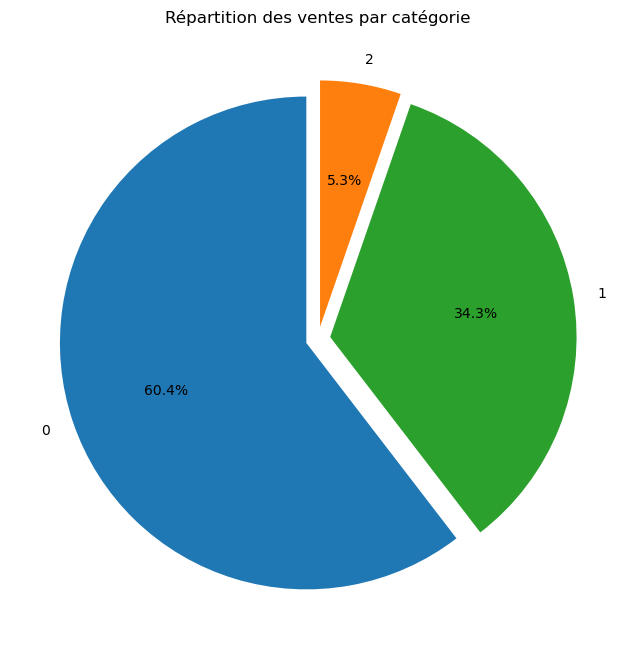

In [59]:
# Compte le nombre de ventes par catégorie
sales_by_category = df_merge['categ'].value_counts()

# Définis les couleurs correspondant aux catégories
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Categ 0 -> bleu, Categ 1 -> vert, Categ 2 -> orange

color_map = {'0': '#1f77b4', '1': '#2ca02c', '2': '#ff7f0e'}
assigned_colors = [color_map[str(c)] for c in sales_by_category.index]

# Trace le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', 
        colors=assigned_colors, startangle=90, explode=[0.05]*len(sales_by_category))

plt.title('Répartition des ventes par catégorie')
plt.show()



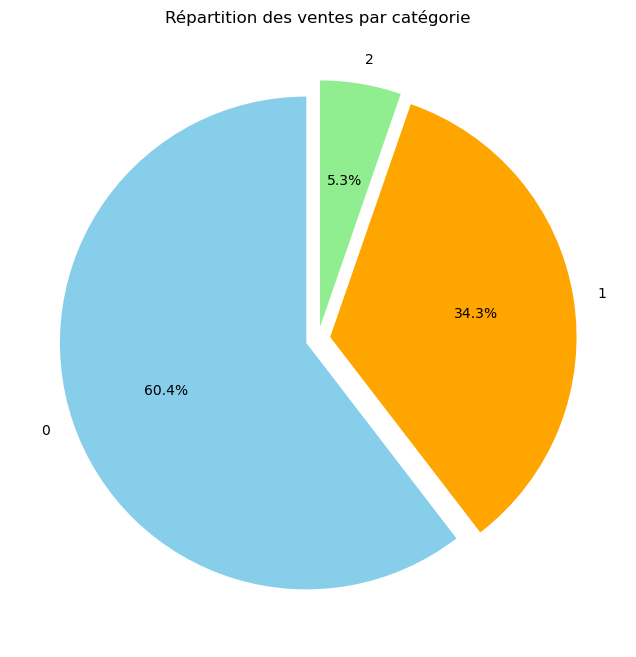

In [60]:
#Compte le nombre de ventes par catégorie
sales_by_category = df_merge['categ'].value_counts()

#Trace le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'], startangle=90, explode=[0.05]*len(sales_by_category))
plt.title('Répartition des ventes par catégorie')
plt.show()

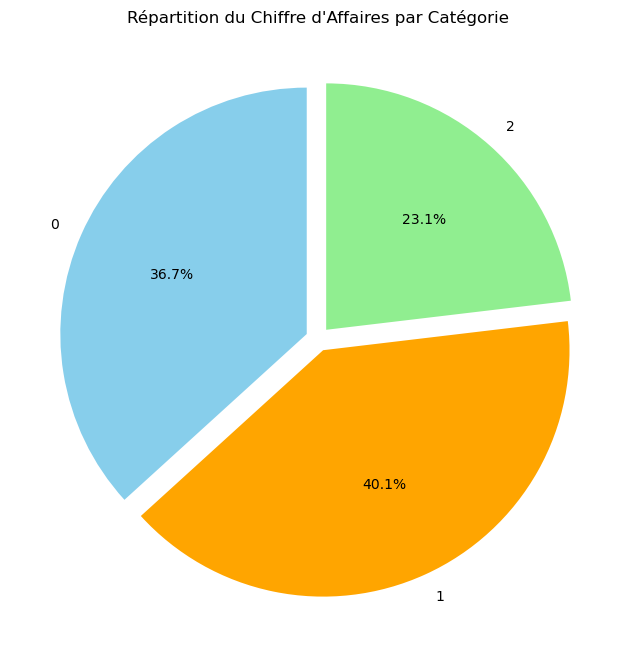

In [61]:
#Calcul du chiffre d'affaires par catégorie
revenue_by_category = df_merge.groupby('categ')['price'].sum()

#Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', 
        colors=['skyblue', 'orange', 'lightgreen'], startangle=90, explode=[0.05]*len(revenue_by_category))

plt.title('Répartition du Chiffre d\'Affaires par Catégorie')
plt.show()

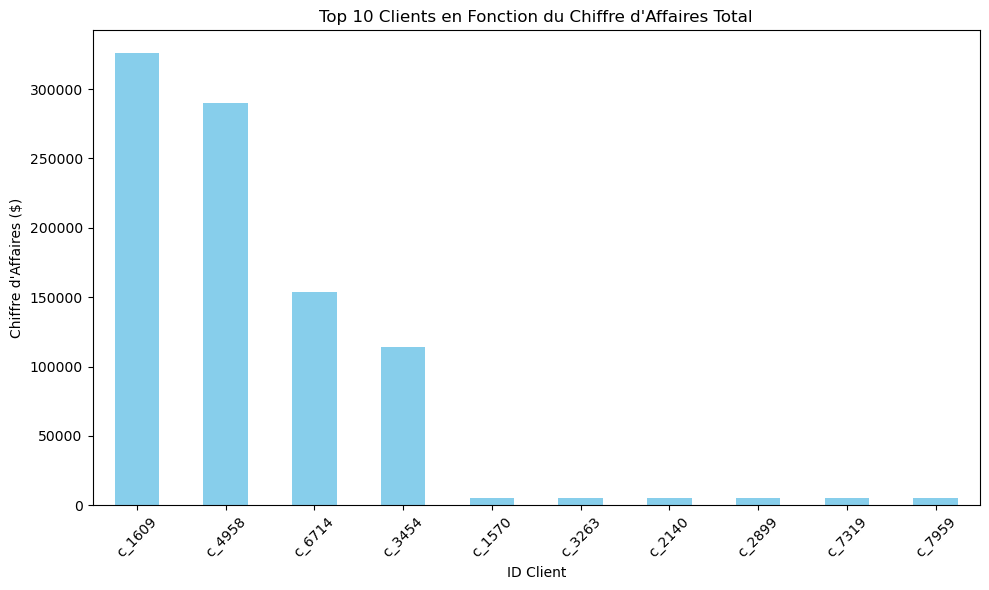

In [62]:
#Calcul du chiffre d'affaires par client
revenue_by_client = df_merge.groupby('client_id')['price'].sum()

#Sélection des 10 meilleurs clients
top_10_clients = revenue_by_client.nlargest(10)

#Création du graphique en barres
plt.figure(figsize=(10, 6))
top_10_clients.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clients en Fonction du Chiffre d\'Affaires Total')
plt.xlabel('ID Client')
plt.ylabel('Chiffre d\'Affaires ($)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
